# Mulitple Linear Regression

### Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

### Step 1 : Reading and Understanding the data

In [1]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import scipy as sp
import scipy.stats as stats
import pylab 

import warnings
warnings.filterwarnings('ignore')

In [2]:
bike_data = pd.read_csv('day.csv')

In [3]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspecting the dataframe

In [4]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Step 2: Data cleaning and Visualising the data

In [7]:
#According to the model building requirement, cnt should be considered as the target variable. 
#Hence the individuals casual and registered will not add any value to our model as cnt gives a summation of the mentioned.
#Dropping casual and registered
bike_data.drop(columns=['casual','registered'],axis=1,inplace=True)

In [8]:
#dropping dteday column as its fuctionality is not of much use in here
bike_data.drop(columns=['dteday','instant'],axis=1,inplace=True)

In [9]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
#encoding the categorical variables based on the information obtained from the data dictionary
def encode_season(m):
    return {
        1: 'spring',
        2: 'summer',
        3: 'fall',
        4: 'winter',
    }[m]

bike_data['season'] = bike_data['season'].apply(lambda x : encode_season(x))

def encode_month(x):
    return {
        1:'Jan',
        2:'Feb',
        3:'Mar',
        4:'Apr',
        5:'May',
        6:'Jun',
        7:'Jul',
        8:'Aug',
        9:'Sep',
        10:'Oct',
        11:'Nov',
        12:'Dec'
    }[x]

bike_data['mnth'] = bike_data['mnth'].apply(lambda x : encode_month(x))

def encode_weather_situation(w):
    return {
        1: 'clear',
        2: 'mist',
        3: 'light',
        4: 'heavy',
    }[w]

bike_data['weathersit'] = bike_data['weathersit'].apply(lambda x : encode_weather_situation(x))

def encode_weekday(w):
    return {
        0: 'Sunday',
        1: 'Monday',
        2: 'Tuesday',
        3: 'Wednesday',
        4: 'Thursday',
        5: 'Friday',
        6: 'Saturday'
    }[w]

bike_data['weekday'] = bike_data['weekday'].apply(lambda x : encode_weekday(x))

<Figure size 1440x1440 with 0 Axes>

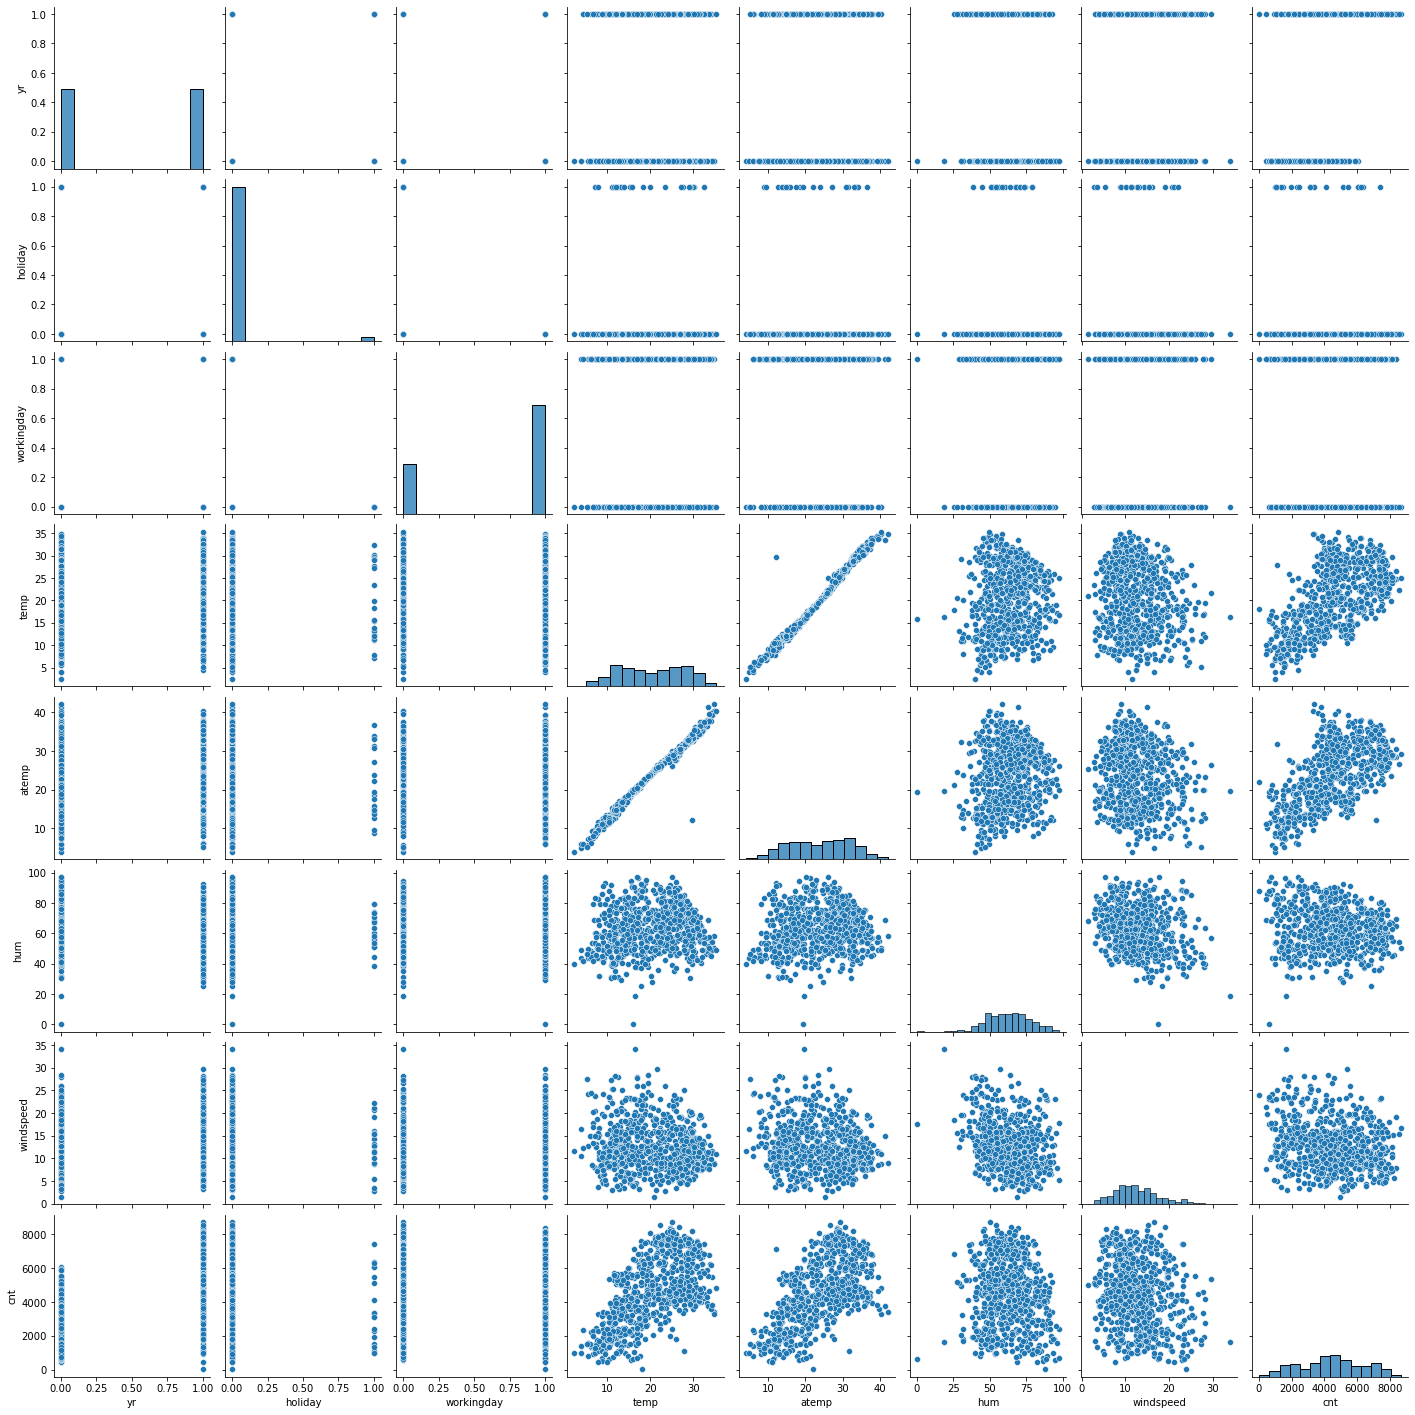

In [11]:
#visualising the numeric variables
plt.figure(figsize=(20,20))
sns.pairplot(bike_data)

There is clearly exists a linear realtionship among variables

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

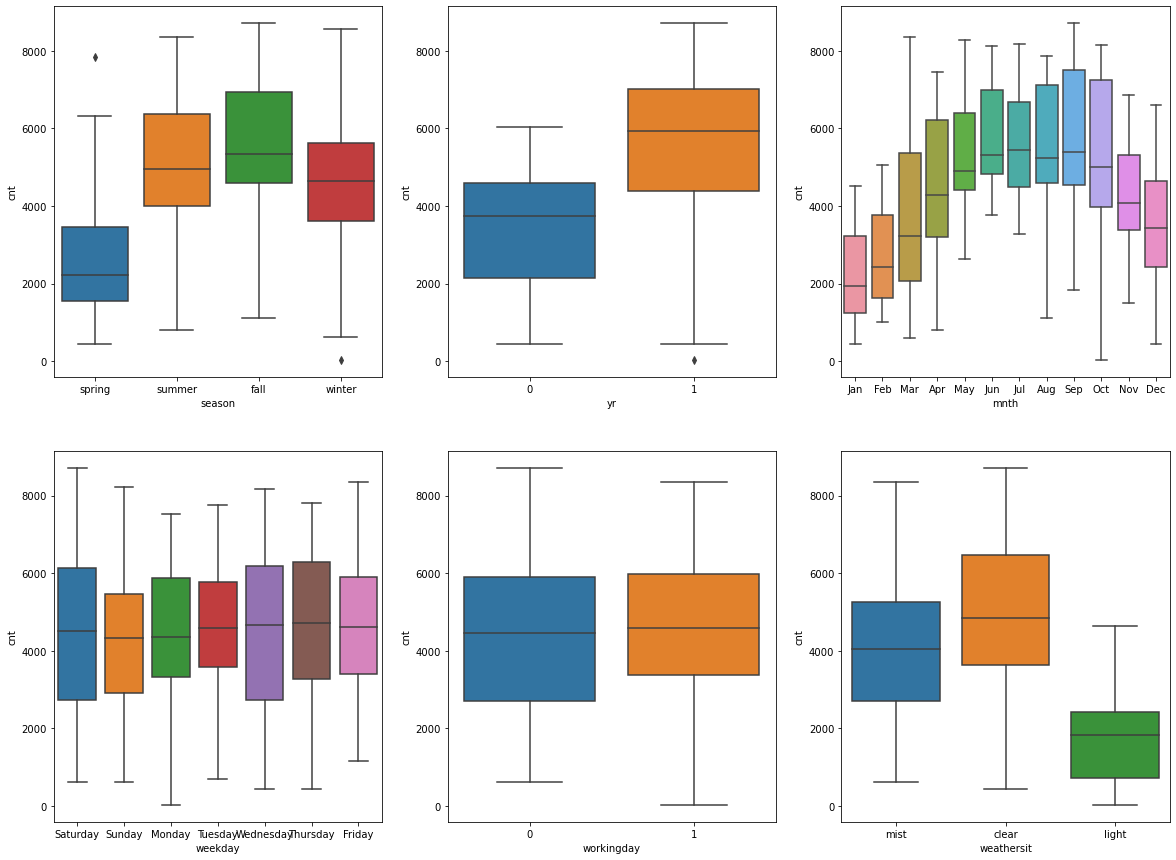

In [12]:
#visualising the categorical variables

plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=bike_data)

plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt',data=bike_data)

plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt',data=bike_data)

plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt',data=bike_data)

plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',data=bike_data)

plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data=bike_data)

<AxesSubplot:>

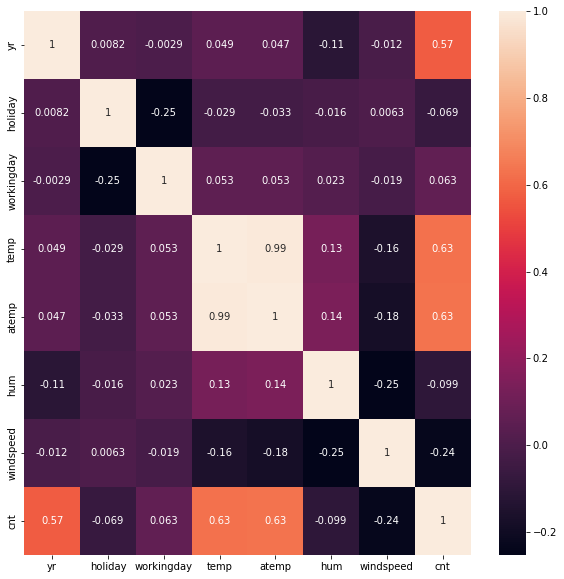

In [13]:
#taking a look at the correlations using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(bike_data.corr(),annot=True)

### Step 3: Data Preparation

In order to fit a regression line, we would need numerical values and not string.

#### Dummy variables

In [14]:
#for variable season
season = pd.get_dummies(bike_data.season)
season.head(100)

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
95,0,0,1,0
96,0,0,1,0
97,0,0,1,0
98,0,0,1,0


Now, we don't need three columns. You can drop the fall, as the type of fall can be identified with just the first three columns where —

000 will correspond to fall
001 will correspond to winter
010 will correspond to summer
100 will correspond to spring


In [15]:
season = pd.get_dummies(bike_data.season,drop_first = True)

In [16]:
#for variable weather situation
weathersit = pd.get_dummies(bike_data.weathersit)
weathersit.head(100)

,clear,light,mist
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
95,1,0,0
96,1,0,0
97,0,0,1
98,0,0,1


Now, we don't need two columns. We can drop the clear col, as it can be identified with just the first two columns where —

00 will correspond to clear weather
01 will correspond to mist weather
10 will correspond to light weather

In [17]:
weathersit = pd.get_dummies(bike_data.weathersit,drop_first = True)

In [18]:
#for variable weekday
weekday = pd.get_dummies(bike_data.weekday,drop_first = True)

In [19]:
#for variable month
month = pd.get_dummies(bike_data.mnth,drop_first = True)

In [20]:
# Add the results to the original dataframe

bike_data = pd.concat([bike_data, season,weathersit], axis = 1)
bike_data = bike_data.drop(columns=['season','mnth','weekday','weathersit','mnth','weekday'])
#let's take a look at the data now
bike_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,light,mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


### Step 4 : Splitting data into train and test data sets

In [21]:
# We specify this so that the train and test data set always have the same rows, respectively
df_train,df_test = train_test_split(bike_data,train_size=0.7,test_size = 0.3,random_state=100)

In [22]:
#let's check the shape of the training and test data
print(df_train.shape)
print(df_test.shape)

(510, 13)
(219, 13)


#### Rescaling the variables

In [23]:
#rescaling all the variables except the dummy ones
scale = MinMaxScaler()
num_vars=['yr','holiday','temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scale.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,light,mist
653,1.0,0.0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0
576,1.0,0.0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0
426,1.0,0.0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,1
728,1.0,0.0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0
482,1.0,0.0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,1


In [24]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,light,mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


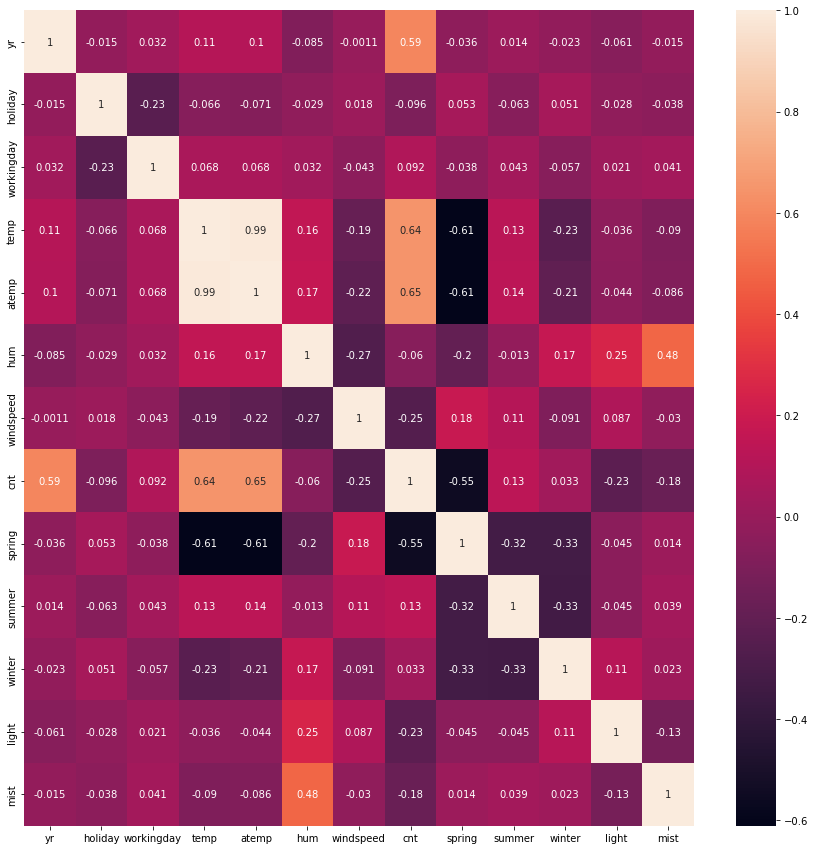

In [25]:
#checking which coefficients are highly related
plt.figure(figsize = (15, 15))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

From the above heatmap yr,temp and atemp seems to be correlated to cnt the most. Let us take one variable at a time.
Let's see a pairplot for temp vs cnt.

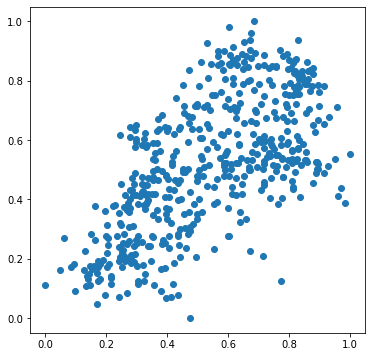

In [26]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

So let us pick temp and try to fit a regression line through that.

#### Framing X and Y sets

In [27]:
y_train = df_train.pop('cnt')
X_train = df_train

### Step 5 : Model Building

In [28]:
#adding a constant
X_train_sm = sm.add_constant(X_train['temp'])

In [29]:
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params

const    0.169798
temp     0.639952
dtype: float64

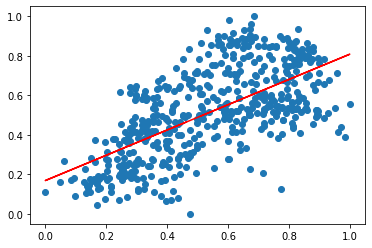

In [30]:
# fitted regression line
plt.scatter(X_train_sm.iloc[:, 1], y_train)
plt.plot(X_train_sm.iloc[:, 1], 0.169 + 0.639*X_train_sm.iloc[:, 1], 'r')
plt.show()

In [31]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           5.80e-61
Time:                        01:08:23   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.000       0.131       0.208
temp           0.6400      0.034     18.949      0.000       0.574       0.706
==============================================================================
Omnibus:                        6.280   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.555
Skew:                           0.098   Prob(JB):                        0.103
Kurtosis:                       2.580   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared value is 0.414, which is not very convincing. Hence let's go and add one more variable. The next highly correlated is atemp.

#### Adding another variable

In [32]:
# Adding atemp
X_train_sm = X_train[['temp','atemp']]
X_train_sm = sm.add_constant(X_train_sm)
lr = sm.OLS(y_train,X_train_sm)
lr1_model = lr.fit()
lr1_model.params
lr1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     182.5
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           1.95e-60
Time:                        01:08:23   Log-Likelihood:                 176.81
No. Observations:                 510   AIC:                            -347.6
Df Residuals:                     507   BIC:                            -334.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1634      0.020      8.215      0.000       0.124       0.202
temp           0.1818      0.233      0.779      0.436      -0.277       0.640
atemp          0.4923      0.248      1.984      0.048       0.005       0.980
==============================================================================
Omnibus:                        4.934   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                3.720
Skew:                           0.079   Prob(JB):                        0.156
Kurtosis:                       2.612   Cond. No.                         56.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There is very marginal improvement in the model. Let's go ahead and add another variable

In [33]:
#adding yr
X_train_sm = X_train[['temp','atemp','yr']]
X_train_sm = sm.add_constant(X_train_sm)
lr = sm.OLS(y_train,X_train_sm)
lr2_model = lr.fit()
lr2_model.params
lr2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     385.8
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.62e-130
Time:                        01:08:23   Log-Likelihood:                 341.97
No. Observations:                 510   AIC:                            -675.9
Df Residuals:                     506   BIC:                            -659.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0724      0.015      4.820      0.000       0.043       0.102
temp           0.0763      0.169      0.451      0.652      -0.256       0.408
atemp          0.5450      0.180      3.032      0.003       0.192       0.898
yr             0.2377      0.011     21.471      0.000       0.216       0.259
==============================================================================
Omnibus:                       37.600   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.841
Skew:                          -0.544   Prob(JB):                     7.49e-13
Kurtosis:                       4.201   Cond. No.                         61.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let us add another variable and take a look at the r-squared value

In [34]:
#adding spring
X_train_sm = X_train[['temp','atemp','yr','spring']]
X_train_sm = sm.add_constant(X_train_sm)
lr = sm.OLS(y_train,X_train_sm)
lr3_model = lr.fit()
lr3_model.params
lr3_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     361.4
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.26e-146
Time:                        01:08:23   Log-Likelihood:                 383.07
No. Observations:                 510   AIC:                            -756.1
Df Residuals:                     505   BIC:                            -735.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1943      0.019     10.233      0.000       0.157       0.232
temp           0.0537      0.156      0.344      0.731      -0.253       0.361
atemp          0.3942      0.167      2.364      0.018       0.067       0.722
yr             0.2410      0.010     23.566      0.000       0.221       0.261
spring        -0.1407      0.015     -9.398      0.000      -0.170      -0.111
==============================================================================
Omnibus:                      106.200   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              298.716
Skew:                          -1.002   Prob(JB):                     1.36e-65
Kurtosis:                       6.168   Cond. No.                         62.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Adding another variable

In [35]:
#adding windspeed
X_train_sm = X_train[['temp','atemp','yr','spring','windspeed']]
X_train_sm = sm.add_constant(X_train_sm)
lr = sm.OLS(y_train,X_train_sm)
lr4_model = lr.fit()
lr4_model.params
lr4_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     311.1
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.73e-151
Time:                        01:08:23   Log-Likelihood:                 397.47
No. Observations:                 510   AIC:                            -782.9
Df Residuals:                     504   BIC:                            -757.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2571      0.022     11.783      0.000       0.214       0.300
temp           0.2066      0.155      1.336      0.182      -0.097       0.510
atemp          0.2114      0.166      1.275      0.203      -0.114       0.537
yr             0.2418      0.010     24.294      0.000       0.222       0.261
spring        -0.1354      0.015     -9.274      0.000      -0.164      -0.107
windspeed     -0.1646      0.030     -5.411      0.000      -0.224      -0.105
==============================================================================
Omnibus:                       88.309   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.985
Skew:                          -0.894   Prob(JB):                     2.52e-46
Kurtosis:                       5.585   Cond. No.                         65.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Adding all the variables

In [36]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lr5_model = lr.fit()
lr5_model.params
lr5_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     200.0
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.86e-181
Time:                        01:08:23   Log-Likelihood:                 488.03
No. Observations:                 510   AIC:                            -950.1
Df Residuals:                     497   BIC:                            -895.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2803      0.036      7.763      0.000       0.209       0.351
yr             0.2303      0.008     27.174      0.000       0.214       0.247
holiday       -0.0746      0.027     -2.729      0.007      -0.128      -0.021
workingday     0.0175      0.009      1.902      0.058      -0.001       0.036
temp           0.4645      0.141      3.306      0.001       0.188       0.741
atemp          0.0321      0.144      0.224      0.823      -0.250       0.314
hum           -0.1387      0.039     -3.541      0.000      -0.216      -0.062
windspeed     -0.1795      0.027     -6.556      0.000      -0.233      -0.126
spring        -0.0749      0.021     -3.593      0.000      -0.116      -0.034
summer         0.0413      0.014      2.918      0.004       0.014       0.069
winter         0.0885      0.017      5.119      0.000       0.055       0.122
light         -0.2422      0.028     -8.787      0.000      -0.296      -0.188
mist          -0.0544      0.011     -4.957      0.000      -0.076      -0.033
==============================================================================
Omnibus:                       60.257   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.281
Skew:                          -0.577   Prob(JB):                     1.29e-36
Kurtosis:                       5.539   Cond. No.                         85.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now, we could omit the variable with the highest, non-significant p value. Let's take a look at the VIF values

In [37]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,374.87
4,atemp,365.50
5,hum,27.39
6,windspeed,4.88
7,spring,3.84
9,winter,3.20
2,workingday,3.19
8,summer,2.35
11,mist,2.28
0,yr,2.08


We shall retain the variables with a VIF < 5 and drop the ones > than that

#### Dropping other variables 

In [38]:
X = X_train.drop('temp', 1,)

In [39]:
# Build a fitted model
X_train_sm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_sm).fit()
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     212.9
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.71e-180
Time:                        01:08:23   Log-Likelihood:                 482.48
No. Observations:                 510   AIC:                            -941.0
Df Residuals:                     498   BIC:                            -890.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3003      0.036      8.355      0.000       0.230       0.371
yr             0.2317      0.009     27.097      0.000       0.215       0.248
holiday       -0.0715      0.028     -2.593      0.010      -0.126      -0.017
workingday     0.0178      0.009      1.910      0.057      -0.001       0.036
atemp          0.4923      0.036     13.792      0.000       0.422       0.562
hum           -0.1372      0.040     -3.469      0.001      -0.215      -0.059
windspeed     -0.1623      0.027     -5.978      0.000      -0.216      -0.109
spring        -0.0964      0.020     -4.812      0.000      -0.136      -0.057
summer         0.0269      0.014      1.979      0.048       0.000       0.054
winter         0.0683      0.016      4.181      0.000       0.036       0.100
light         -0.2390      0.028     -8.591      0.000      -0.294      -0.184
mist          -0.0553      0.011     -4.985      0.000      -0.077      -0.033
==============================================================================
Omnibus:                       61.919   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.663
Skew:                          -0.575   Prob(JB):                     9.70e-40
Kurtosis:                       5.671   Cond. No.                         20.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# Calculate the VIFs again

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,26.95
3,atemp,14.78
5,windspeed,4.50
6,spring,3.57
2,workingday,3.19
8,winter,2.88
10,mist,2.27
7,summer,2.18
0,yr,2.07
9,light,1.24


#### Dropping the Variable and updating the Model
Notice that some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped

In [41]:
X = X.drop('hum', 1,)
X_train_sm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_sm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     228.0
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          6.52e-179
Time:                        01:08:23   Log-Likelihood:                 476.39
No. Observations:                 510   AIC:                            -930.8
Df Residuals:                     499   BIC:                            -884.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2307      0.030      7.654      0.000       0.171       0.290
yr             0.2349      0.009     27.336      0.000       0.218       0.252
holiday       -0.0727      0.028     -2.608      0.009      -0.128      -0.018
workingday     0.0181      0.009      1.923      0.055      -0.000       0.037
atemp          0.4620      0.035     13.204      0.000       0.393       0.531
windspeed     -0.1357      0.026     -5.154      0.000      -0.187      -0.084
spring        -0.1033      0.020     -5.128      0.000      -0.143      -0.064
summer         0.0226      0.014      1.652      0.099      -0.004       0.050
winter         0.0569      0.016      3.518      0.000       0.025       0.089
light         -0.2773      0.026    -10.742      0.000      -0.328      -0.227
mist          -0.0776      0.009     -8.506      0.000      -0.096      -0.060
==============================================================================
Omnibus:                       60.475   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.704
Skew:                          -0.576   Prob(JB):                     3.83e-37
Kurtosis:                       5.562   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Calculate the VIFs again

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,windspeed,4.48
3,atemp,4.44
2,workingday,3.14
5,spring,2.08
0,yr,2.06
6,summer,1.83
7,winter,1.68
9,mist,1.53
1,holiday,1.09
8,light,1.08


The VIFs and p-values both are within an acceptable range.We can make our predictions using this model only.

### Step 6 : Residual Analysis of the train data

Lets check if the error terms are also normally distributed. This is also one of the assumptions of linear regression.

In [44]:
y_train_pred = lr_7.predict(X_train_sm)

Text(0.5, 1.0, 'Residual Plot')

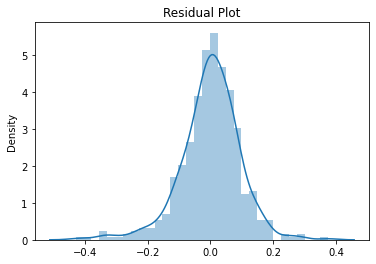

In [45]:
# Plot the histogram of the error terms
resi = y_train - y_train_pred
plt.figure()
sns.distplot(resi)
plt.title('Residual Plot')

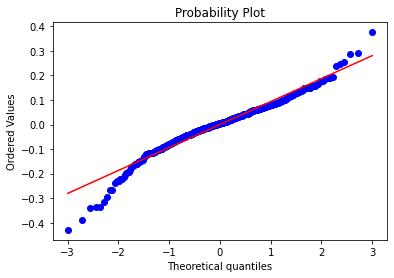

In [46]:
#the below graph is to show that the assumption, error terms are normally distributed with mean 0
stats.probplot(resi, dist="norm", plot=pylab)
pylab.show()

### Step 7 : Making Predictions

#### Scaling the test sets

In [47]:
num_vars=['yr','holiday','temp','atemp','hum','windspeed','cnt']
df_test[num_vars] = scale.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,light,mist
184,0.0,1.0,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,1
535,1.0,0.0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0
299,0.0,0.0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,1
221,0.0,0.0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,0,0
152,0.0,0.0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0


In [48]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,light,mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into train and test sets

In [50]:
y_test = df_test.pop('cnt')
X_test = df_test

In [51]:
#add a const or intercept to test
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,light,mist
184,1.0,0.0,1.0,0,0.831783,0.769660,0.657364,0.084219,0,0,0,0,1
535,1.0,1.0,0.0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,0,0
299,1.0,0.0,0.0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,0,1
221,1.0,0.0,0.0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,0,0
152,1.0,0.0,0.0,1,0.817246,0.741471,0.314298,0.537414,0,1,0,0,0


In [52]:
#dropping these variables as they are not a part of the training model we are valuating it against
X_test_sm = X_test_sm.drop(['hum','temp'],axis=1)

In [55]:
#make predictions
y_test_pred = lr_7.predict(X_test_sm)

### Step 8 : Evaluating the model

In [56]:
#evaluating the model based on r2_score(as mentioned in the problem statement as well)
y_pred=y_test_pred
r2_score(y_test, y_pred)

0.8023495361793256

##### The r-squared value of the training model was 0.82. The same prediction for the model was 0.80 which is quite reasonable and close. This infers that what we had learnt on the training set, we are able to generalise on the test set as well.

Text(0, 0.5, 'y_pred')

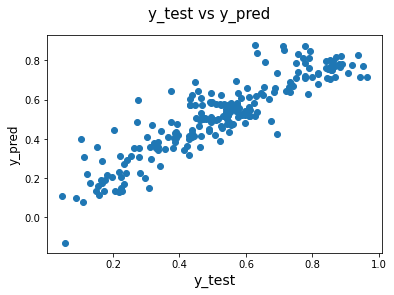

In [60]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15)             
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 12) 

We can see that the equation of our best fitted line is:



##### cnt = 0.235 x yr + 0.018 x workingday - 0.072 x holiday + 0.462 x atemp - 0.136 x windspeed - 0.103 x spring + 0.023 x summer + 0.057 x winter - 0.278 x light - 0.078 x mist

Overall we have a decent model